# kuzushiji-recognition_training

### importing libraries

In [2]:
%matplotlib inline

#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import ImageFont, ImageDraw, Image
import pandas as pd
import numpy as np
import pickle
import cv2
import os

## importing X and y

In [16]:
X = pickle.load( open( "chars/X_2.p"  , "rb" ) )
y = pickle.load( open( "chars/y_all.p", "rb" ) )#[67:len(X)+67]
X = np.array(X)#.transpose(2,0,1).reshape(3,-1)
y = np.array(y)
print(len(X), len(y))
print(X[0][0])

49995 683442
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [253 255 255]
 [253 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 254 255]
 [255 254 255]
 [247 249 250]
 [231 236 237]
 [212 224 226]
 [164 177 179]
 [ 67  79  81]
 [  0   1   4]
 [  0   0   3]
 [  0   0   3]
 [  0   0   

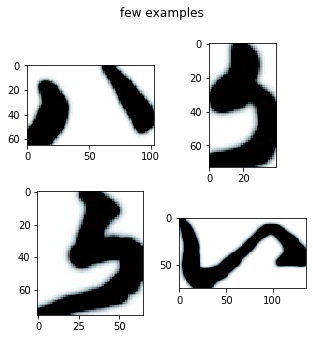

In [23]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('few examples')

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(X[0])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(X[1])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(X[2])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(X[3])

In [9]:
# X, y = [], [] # For words that accured more than 100 times where X contains caracters imgs and y contains labels

# for i in tqdm(range(50)):
#     img_path ="train_images_bw/" + df["image_id"][i] + ".jpg"
#     img = cv2.imread(img_path)
#     X,y = get_rect_img(img, i, counted_elements, X, y)
# X = np.array(X)#.transpose(2,0,1).reshape(3,-1)
# y = np.array(y)
# print(len(X), len(y))
# print("Done")

### Encoding the Dependent Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(y[:10])

[46 11 11  7 42 42 53 12 11 43]


## Training XGBoost on the Training set

In [12]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)## Training XGBoost on the Training set

ValueError: Please reshape the input data X into 2-dimensional matrix.

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)## Making the Confusion Matrix## Making the Confusion Matrix